In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mltools import my_convert_to_number
from wordcloud import WordCloud
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
sns.set(style="darkgrid")

In [171]:
odi_df = pd.read_csv('ODI-2022.csv',delimiter=";")

### Number of records

In [172]:
print(len(odi_df.index))

304


### Number of attributes

In [173]:
print(len(odi_df.columns))

17


### Attributes are
    

In [174]:
print((odi_df.columns))

Index(['Tijdstempel', 'What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'Chocolate makes you.....', 'When is your birthday (date)?',
       'Number of neighbors sitting around you?', 'Did you stand up?',
       'What is your stress level (0-100)?',
       'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
       'Give a random number', 'Time you went to be Yesterday',
       'What makes a good day for you (1)?',
       'What makes a good day for you (2)?'],
      dtype='object')


### Replace columns name

In [175]:
 odi_df.columns = ['time',\
                   'program',\
                   'ML',\
                   'IR',\
                   'Statistics',\
                   'DB',\
                   'Gender',\
               'Chocolate_influence',\
                   'Birthday',\
                   'neighbors',\
                   'Stand_Up',\
                   'Stress',\
              'Euros_Question',\
                   'random_number',\
                   'time_to_bed',\
                   'good_day_1',\
                   'good_day_2']
display(odi_df)

,time,program,ML,IR,Statistics,DB,Gender,Chocolate_influence,Birthday,neighbors,Stand_Up,Stress,Euros_Question,random_number,time_to_bed,good_day_1,good_day_2
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food
5,4-5-2022 12:12:20,Artificial Intelligence,no,unknown,sigma,unknown,female,fat,28,0,no,48,1000,87,2130,This lecture,Sun
6,4-5-2022 12:12:26,Artificial Intelligence,yes,0,unknown,nee,male,neither,15.10.98,1,no,20,0.1,6,00:35,sunshine,happiness
7,4-5-2022 12:12:29,M Artificial Intelligence,yes,0,unknown,ja,male,neither,17 November,0,no,100,10,50,23,Rainy Day,Weekend
8,4-5-2022 12:12:29,FinTech,yes,0,mu,ja,male,neither,1995,0,no,20,100 / the number of people,42,23:00,Food,Relaxation
9,4-5-2022 12:12:29,Artificial Intelligence,no,0,mu,ja,female,fat,21-07-2000,5,yes,50,10,88,12 hours,"sun, friends and wine","relaxing, watching a show, hockey"


### Gender distribution

Gender
female                   102
gender fluid               6
intersex                   1
male                     183
not willing to answer     12
Name: Gender, dtype: int64

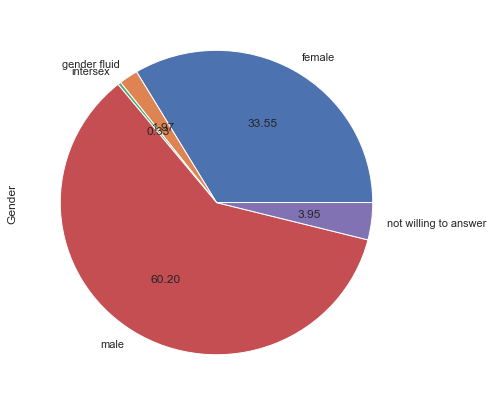

In [176]:
display(odi_df.groupby('Gender')['Gender'].count())
odi_df.groupby('Gender')['Gender'].count().plot.pie(autopct='%.2f',figsize=(7,7))
#mask = (odi_df['Gender']!='male') & (odi_df['Gender']!='female')
#odi_df['Gender'].loc[mask]

### Random number

In [177]:
odi_df['random_number'] = odi_df['random_number'].map(my_convert_to_number)
odi_df['Stress'] = odi_df['Stress'].map(my_convert_to_number)
odi_df['random_number'] = odi_df['random_number'].map(my_convert_to_number)
odi_df['neighbors'] = odi_df['neighbors'].map(my_convert_to_number)
odi_df['Euros_Question'] = odi_df['Euros_Question'].map(my_convert_to_number)


### Distribution of gender who has entred random numbers noise

In [178]:
display(odi_df[['Stress','random_number','Gender','Chocolate_influence','time_to_bed']].loc[odi_df['random_number'].isna()==False])


,Stress,random_number,Gender,Chocolate_influence,time_to_bed
0,0.000000e+00,8.880000e+02,female,neither,23:00
1,2.000000e+02,1.200000e+01,male,fat,32
2,0.000000e+00,9.000000e+00,male,fat,x
3,2.000000e+01,3.100000e+01,male,neither,14:00
4,2.000000e+00,8.600000e+01,male,fat,07:20
5,4.800000e+01,8.700000e+01,female,fat,2130
6,2.000000e+01,6.000000e+00,male,neither,00:35
7,1.000000e+02,5.000000e+01,male,neither,23
8,2.000000e+01,4.200000e+01,male,neither,23:00
9,5.000000e+01,8.800000e+01,female,fat,12 hours


In [179]:
odi_df.corr(method ='pearson')

,neighbors,Stress,Euros_Question,random_number
neighbors,1.000000,-0.003453,-0.006193,-0.005803
Stress,-0.003453,1.000000,-0.006156,-0.000000
Euros_Question,-0.006193,-0.006156,1.000000,-0.006399
random_number,-0.005803,-0.000000,-0.006399,0.000000


### Pie chart of Gender put None as random number - no rule obeing 

Text(0.5,1,'gender distribution for correct data in random number')

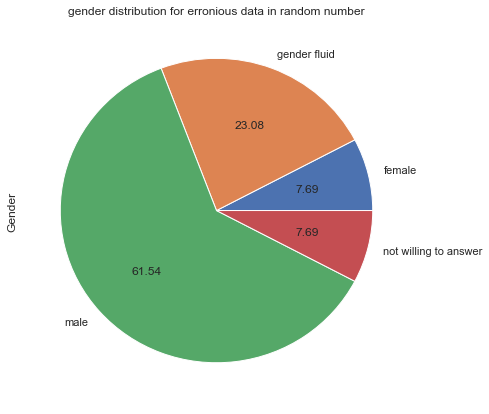

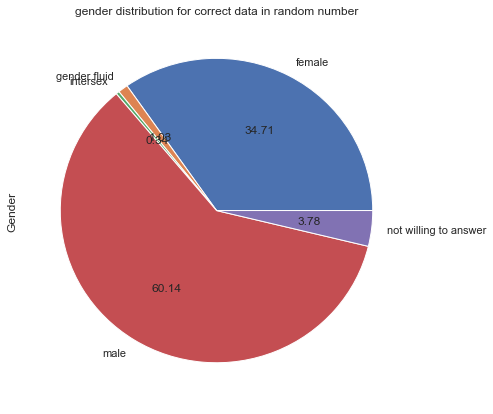

In [180]:
plt.figure(1)
odi_df[['Gender']].loc[odi_df['random_number'] .isna()].groupby('Gender')['Gender'].count().plot.pie(autopct='%.2f',figsize=(7,7))
plt.title('gender distribution for erronious data in random number')

plt.figure(2)
odi_df[['Gender']].loc[odi_df['random_number'] .isna()==False].groupby('Gender')['Gender'].count().plot.pie(autopct='%.2f',figsize=(7,7))
plt.title('gender distribution for correct data in random number')


### Good day distribution

In [181]:
dictionary=Counter(list(odi_df['good_day_1'].map(lambda x: x.lower()))+list(odi_df['good_day_2'].map(lambda x: x.lower())))
#sns.boxplot(pd.Series(dictionary, index=dictionary.keys()).sort_values(ascending=False), x=index)
#cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
#plt.figure(figsize=(16,12))
#plt.imshow(cloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()

#plt.bar(dictionary)
pd.set_option("display.max_rows", None, "display.max_columns", None)
odi_df['ML']

0          yes
1          yes
2          yes
3          yes
4          yes
5           no
6          yes
7          yes
8          yes
9           no
10          no
11         yes
12         yes
13          no
14         yes
15         yes
16          no
17          no
18         yes
19         yes
20         yes
21         yes
22     unknown
23         yes
24         yes
25         yes
26          no
27         yes
28         yes
29          no
30         yes
31         yes
32         yes
33          no
34          no
35         yes
36         yes
37         yes
38         yes
39         yes
40         yes
41          no
42          no
43          no
44         yes
45         yes
46         yes
47         yes
48         yes
49          no
50         yes
51          no
52         yes
53         yes
54         yes
55         yes
56         yes
57         yes
58         yes
59         yes
60         yes
61         yes
62          no
63          no
64          no
65         yes
66        

In [184]:
odi_df = odi_df[['ML','IR','DB']].replace({"yes", 'ja', "1"}, 1)
odi_df = odi_df[['ML','IR','DB']].replace({"no", 'nee', "0"}, 0)
odi_df = odi_df[['ML','IR','DB']].replace("unknown", None)
odi_df[['ML','IR','DB']].applymap(my_convert_to_number)
#odi_df[['ML','IR','DB']].replace("ja", 1)



,ML,IR,DB
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,0.0,0.0
4,1.0,1.0,1.0
5,0.0,1.0,1.0
6,1.0,0.0,0.0
7,1.0,0.0,1.0
8,1.0,0.0,1.0
9,0.0,0.0,1.0


In [186]:
frequent_itemsets = apriori(odi_df[['ML','IR','DB']], min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [187]:
print(rules)

   antecedents consequents  antecedent support  consequent support   support  \
0         (IR)        (ML)            0.269737            0.628289  0.223684   
1         (ML)        (IR)            0.628289            0.269737  0.223684   
2         (DB)        (ML)            0.539474            0.628289  0.384868   
3         (ML)        (DB)            0.628289            0.539474  0.384868   
4         (IR)        (DB)            0.269737            0.539474  0.223684   
5         (DB)        (IR)            0.539474            0.269737  0.223684   
6     (IR, DB)        (ML)            0.223684            0.628289  0.190789   
7     (DB, ML)        (IR)            0.384868            0.269737  0.190789   
8     (IR, ML)        (DB)            0.223684            0.539474  0.190789   
9         (DB)    (IR, ML)            0.539474            0.223684  0.190789   
10        (IR)    (DB, ML)            0.269737            0.384868  0.190789   
11        (ML)    (IR, DB)            0.